## Final Project


#### Import athlete_events.csv

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib notebook
%matplotlib inline

data = pd.read_csv('athlete_events.csv')

#### Adding Has_Medal column to data for correlation and drop duplicates

In [15]:
data['Has_Medal'] = data['Medal'].notna()

# sort by has_medal to keep data if athlete has earned medal, drop duplicates, then sort back to ID
data_unique = data.sort_values(by='Has_Medal', ascending=False).drop_duplicates(subset=['ID'], keep='first').sort_values(by='ID')

#### Correlation between Age, Height, Weight and having medal

In [16]:
columns = data[['Age', 'Height', 'Weight', 'Has_Medal']]
columns.corr().style.background_gradient(cmap='coolwarm')

,Age,Height,Weight,Has_Medal
Age,1.000000,0.138246,0.212069,0.024126
Height,0.138246,1.000000,0.796213,0.087532
Weight,0.212069,0.796213,1.000000,0.088510
Has_Medal,0.024126,0.087532,0.088510,1.000000


### Data Analysis Graphs
#### Pie chart to show proportion of athletes in each country played in olympics


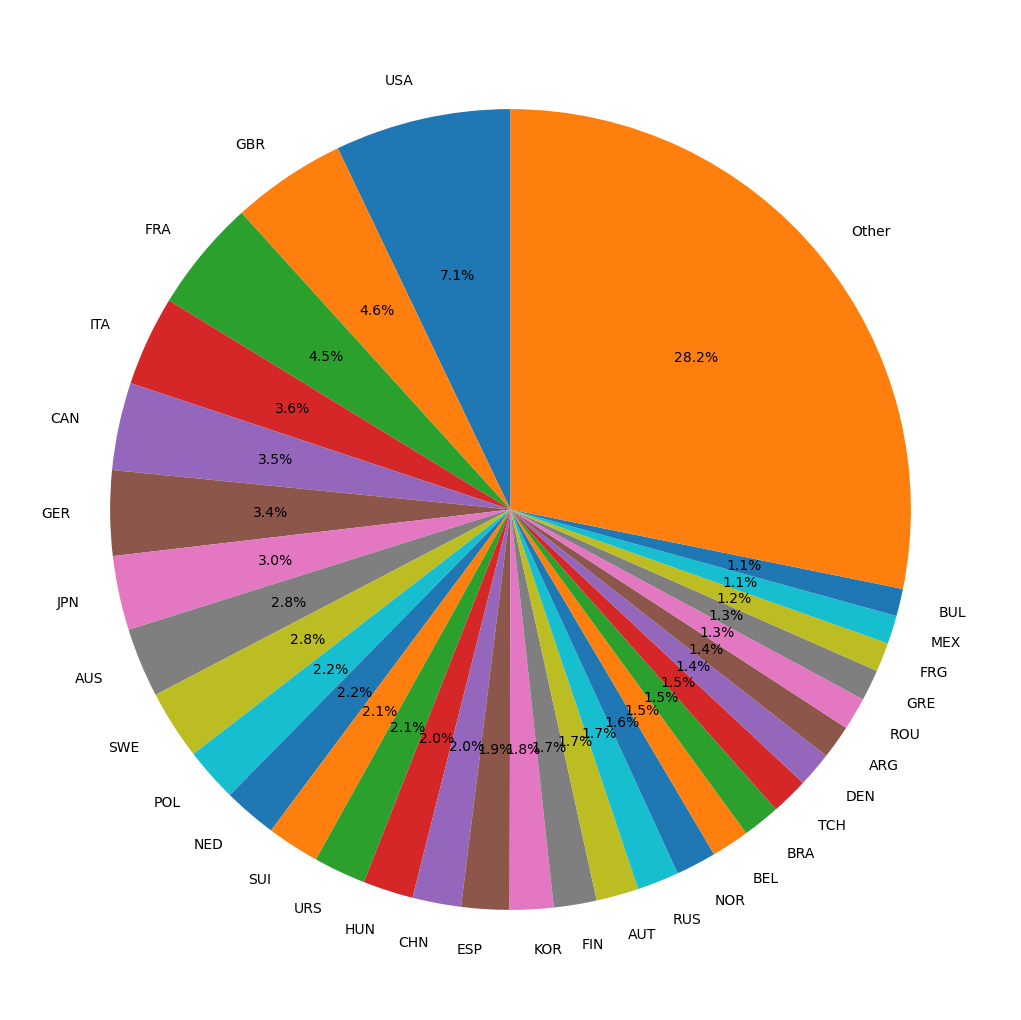

In [17]:
team_counts = data_unique['NOC'].value_counts()

plt.figure(figsize=(13, 13))

# Combine teams with less than 1% of athletes into Other
threshold = 0.01 * team_counts.sum()
team_counts_with_other = team_counts[team_counts >= threshold]
team_counts_with_other['Other'] = team_counts[team_counts < threshold].sum()

plt.pie(team_counts_with_other, labels=team_counts_with_other.index, startangle=90, autopct='%1.1f%%')
plt.show()

#### Medal Counts by Country

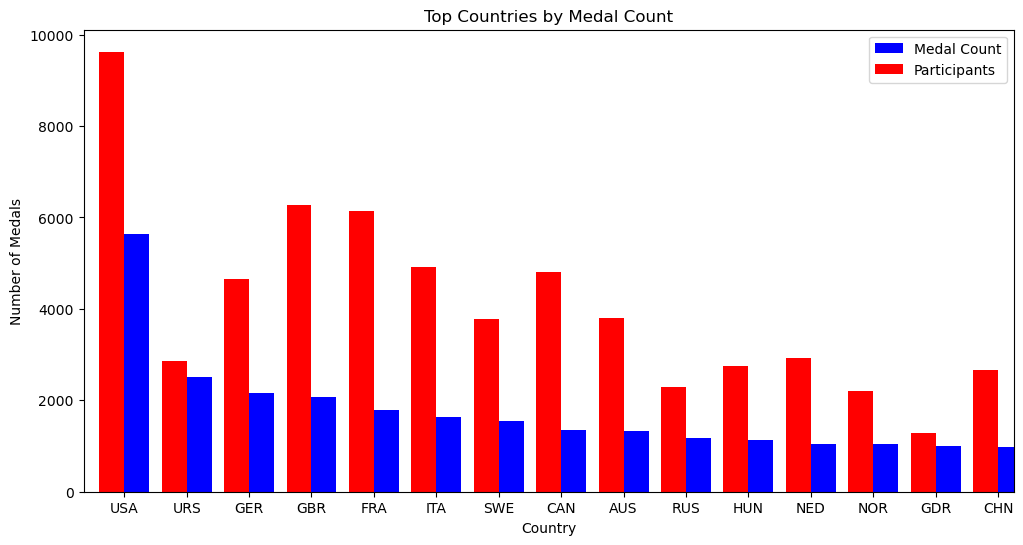

In [18]:
medal_counts = data[data['Medal'].notna()]['NOC'].value_counts().nlargest(15)

participants_in_country = data_unique.groupby('NOC').size()

plt.figure(figsize=(12, 6))
medal_counts.plot(kind='bar', color='blue', position=0, width=0.4, label='Medal Count')
participants_in_country.loc[medal_counts.index].plot(kind='bar', color='red', position=1, width=0.4, label='Participants')
plt.title('Top Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=0, ha='center')
plt.legend()
plt.show()

#### Top 15 Athletes by Medal Count

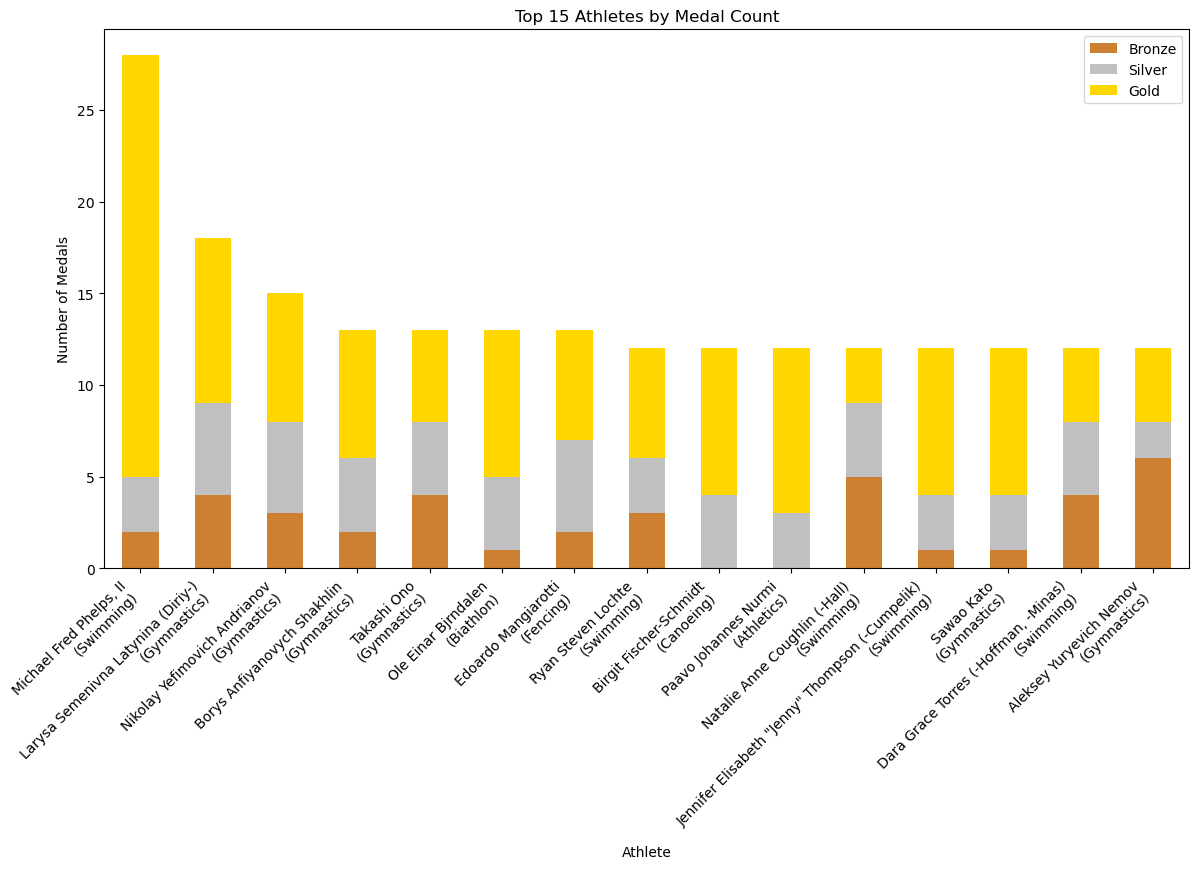

In [40]:
athlete_medals = data.groupby(['Name', 'Medal']).size().unstack()
# Sort the athletes by medal count and get top 15 athletes
top_athletes = athlete_medals.sum(axis=1).sort_values(ascending=False).head(15)
top_athletes_medals = athlete_medals.loc[top_athletes.index]

# Create a unique dataset of athletes
data_unique = data.drop_duplicates(subset=['Name'])[['Name', 'Sport']]

# Merge top athletes with unique athletes data to get sports
top_athletes_sports = pd.merge(top_athletes.reset_index(), data_unique, on='Name').set_index('Name')['Sport']

# Order the medals by bronze, silver and gold
top_athletes_medals = top_athletes_medals[['Bronze', 'Silver', 'Gold']]

# Add sport below each athlete's name
top_athletes_medals.index = [f"{name}\n({top_athletes_sports.loc[name]})" for name in top_athletes_medals.index]

top_athletes_medals.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#CD7F32', '#C0C0C0', '#FFD700'])
plt.title('Top 15 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

#### Line Plot of Medal Count based on Age

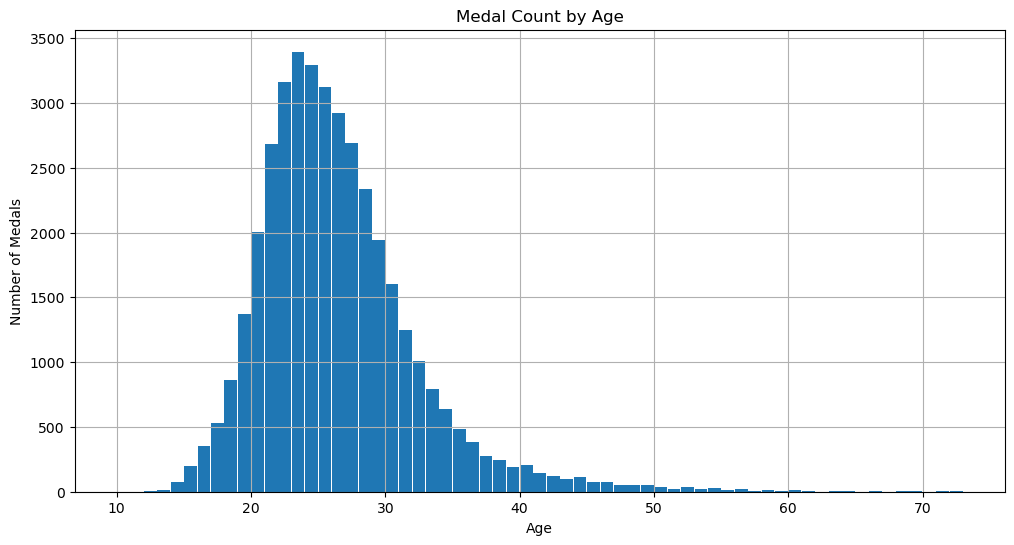

In [ ]:
# Group by Age and count the number of medals
age_medal_counts = data[data['Medal'].notna()].groupby('Age').size()

plt.figure(figsize=(12, 6))
plt.hist(age_medal_counts.index, bins=range(int(age_medal_counts.index.min()), int(age_medal_counts.index.max()) + 1), weights=age_medal_counts, rwidth=0.95)
plt.title('Medal Count by Age')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

#### Sports with the Most Medals Awarded

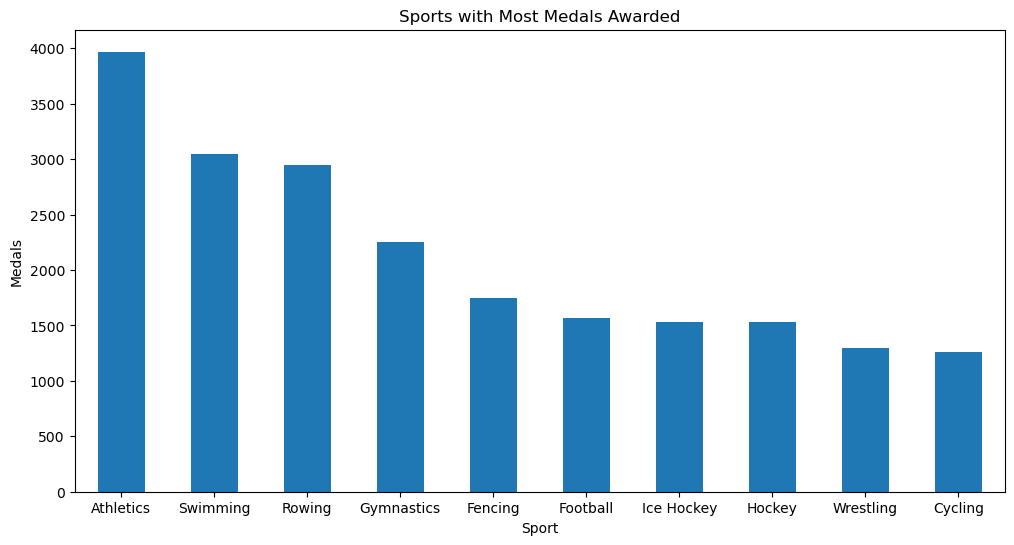

In [ ]:
sport_medal_counts = data[data['Medal'].notna()].groupby('Sport').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sport_medal_counts.plot(kind='bar')
plt.ylabel('Medals')
plt.xticks(rotation=0, ha='center')
plt.title('Sports with Most Medals Awarded')
plt.show()

#### Participants over Time

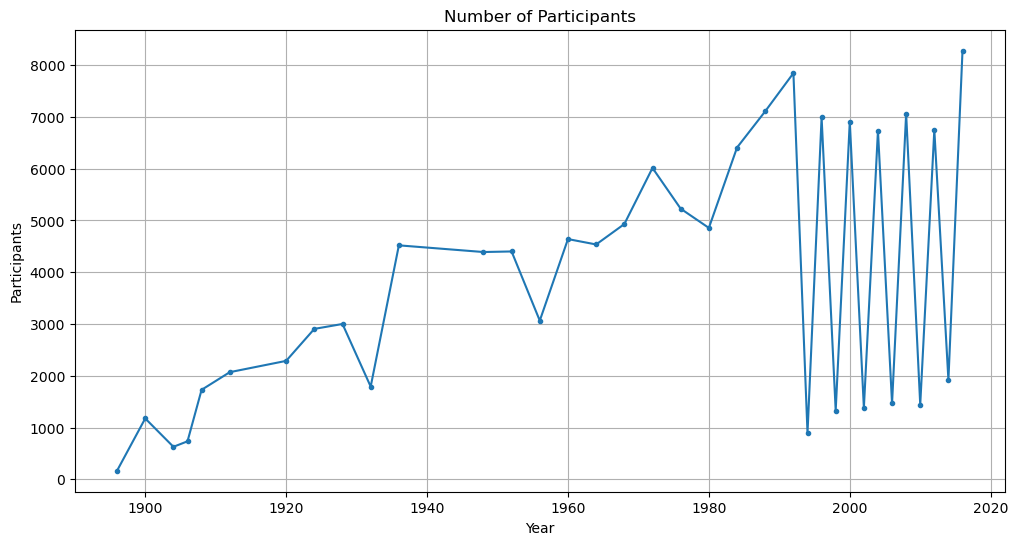

In [ ]:
participant_count = data_unique.groupby('Year').size()

plt.figure(figsize=(12,6))
plt.plot(participant_count, marker='.')
plt.title('Number of Participants')
plt.xlabel('Year')
plt.ylabel('Participants')
plt.grid(True)
plt.show()

#### Top Countries in Sport Function

In [ ]:
def top_countries_in_sport(sport):
    sport_data = data[data['Sport'] == sport]
    medal_counts = sport_data[sport_data['Medal'].notna()]['NOC'].value_counts().nlargest(15)

    plt.figure(figsize=(12, 6))
    medal_counts.plot(kind='bar')
    plt.title(f'Top Countries in {sport} by Medal Count')
    plt.xlabel('Country')
    plt.ylabel('Number of Medals')
    plt.xticks(rotation=0, ha='center')
    plt.show()

#### Create graphs for the top countries in each of the most medals awarded sports

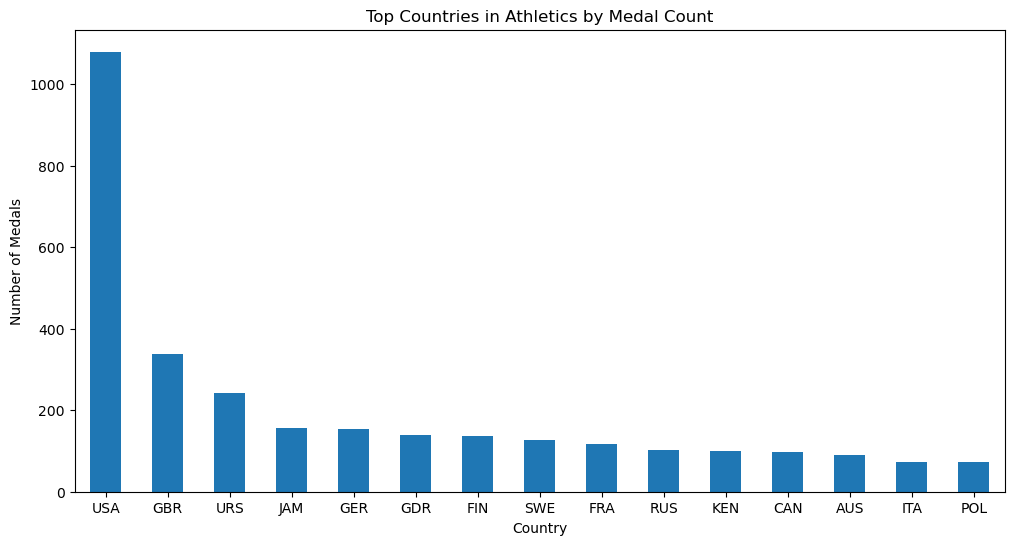

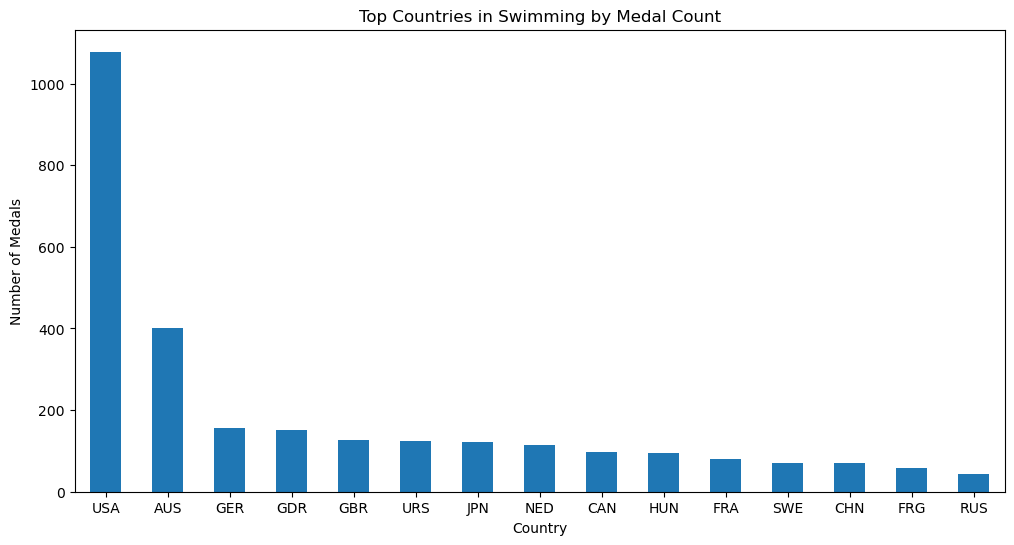

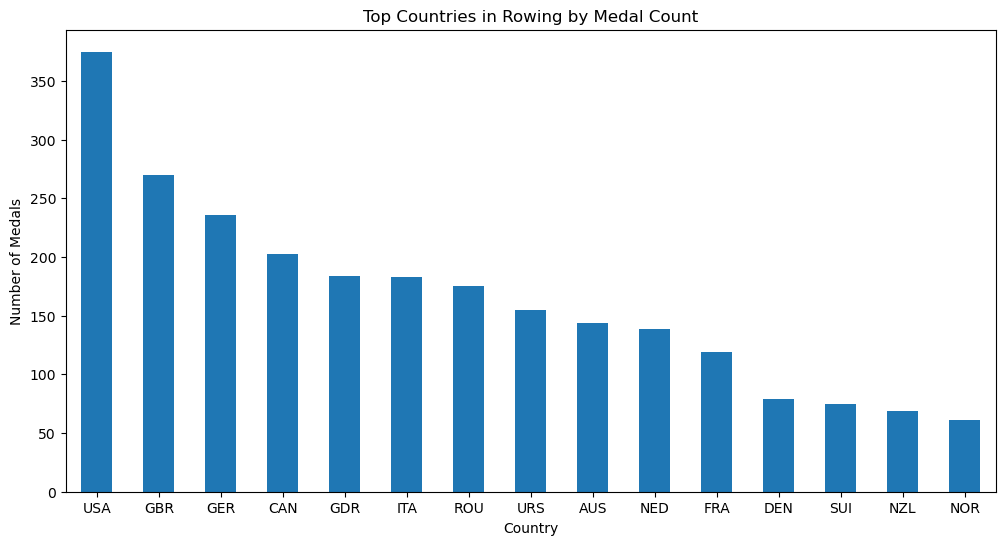

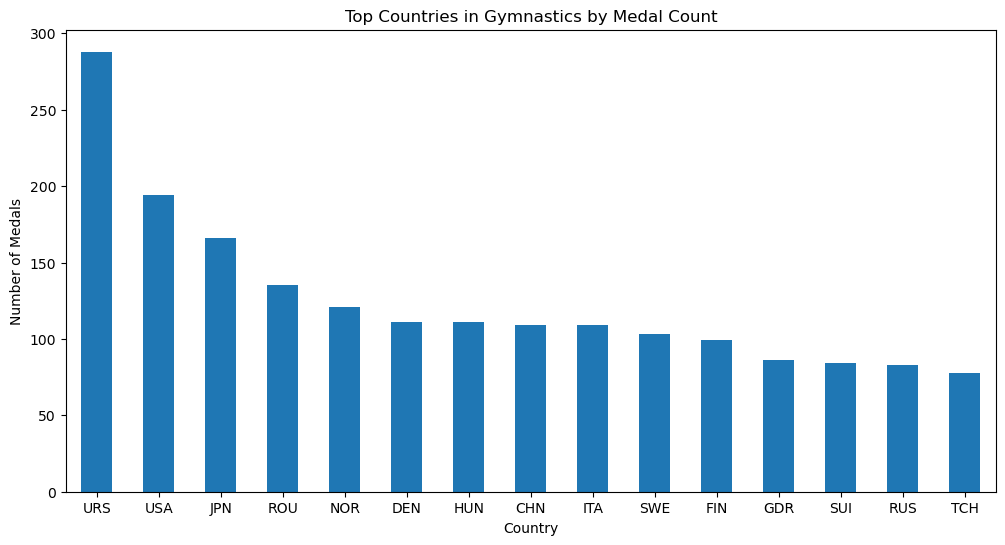

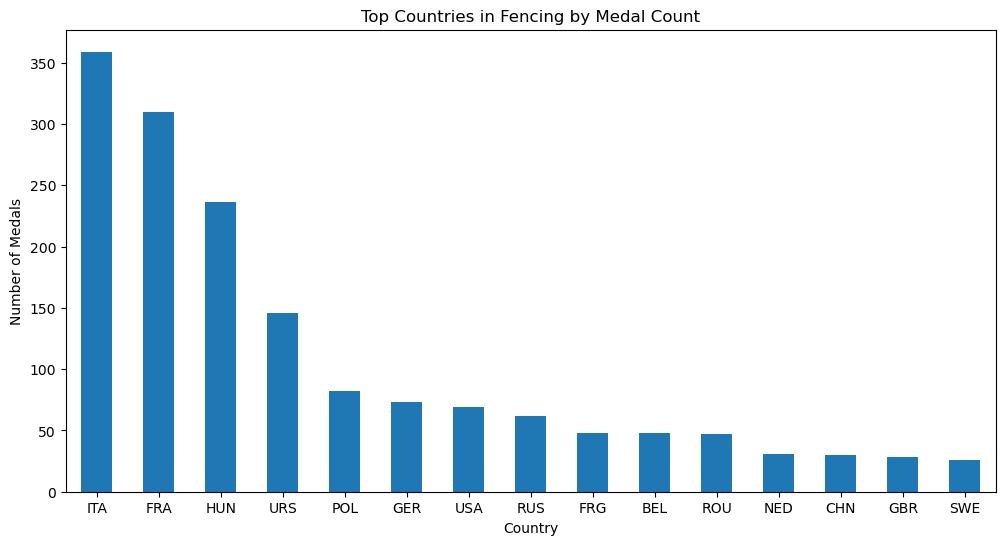

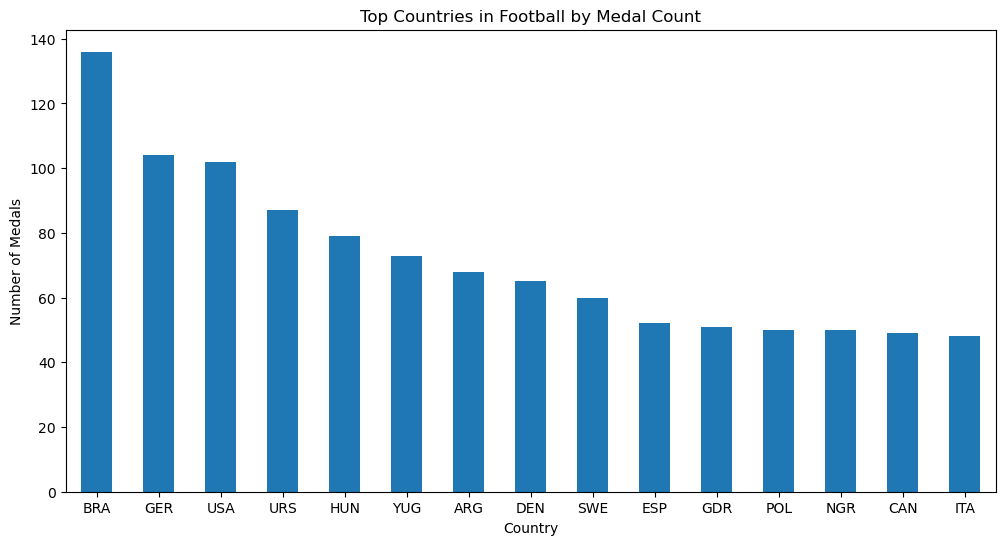

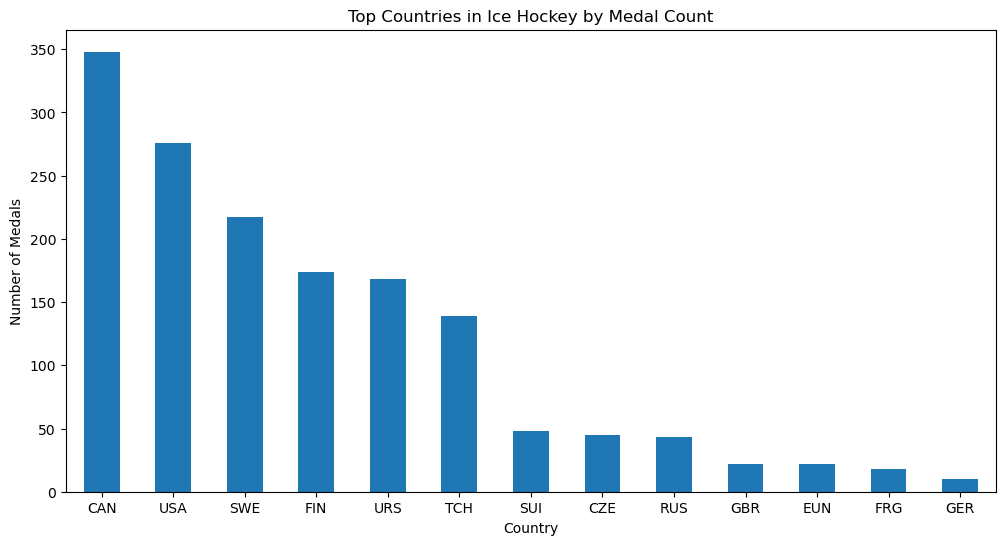

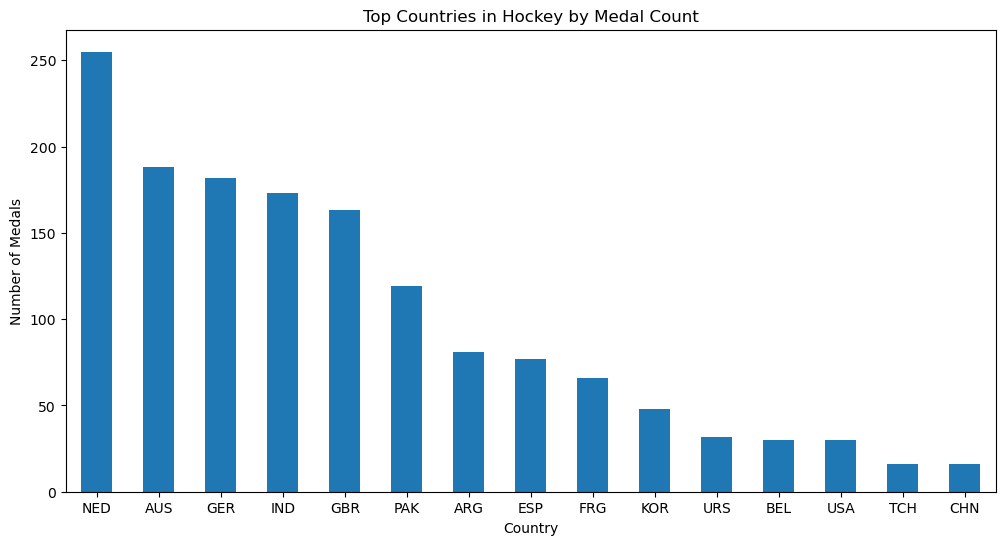

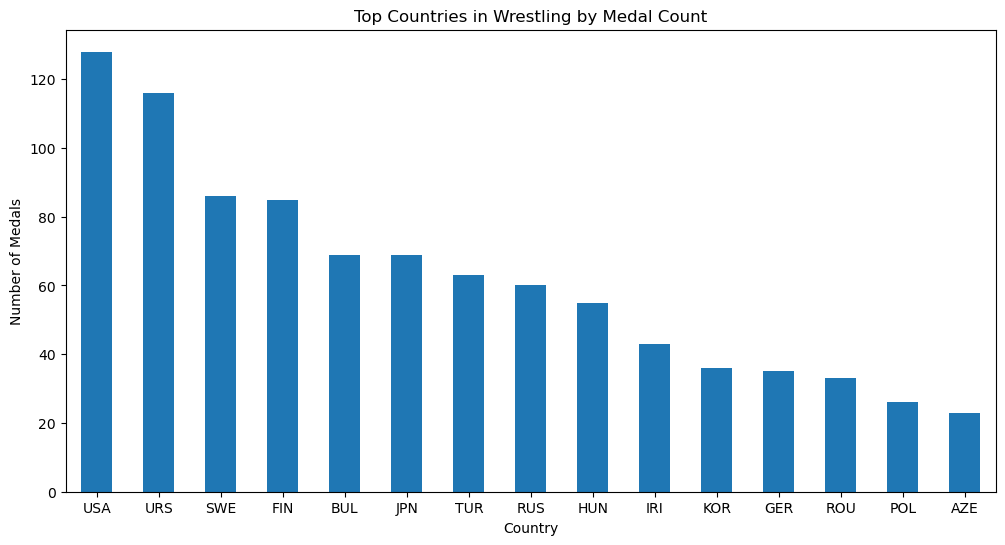

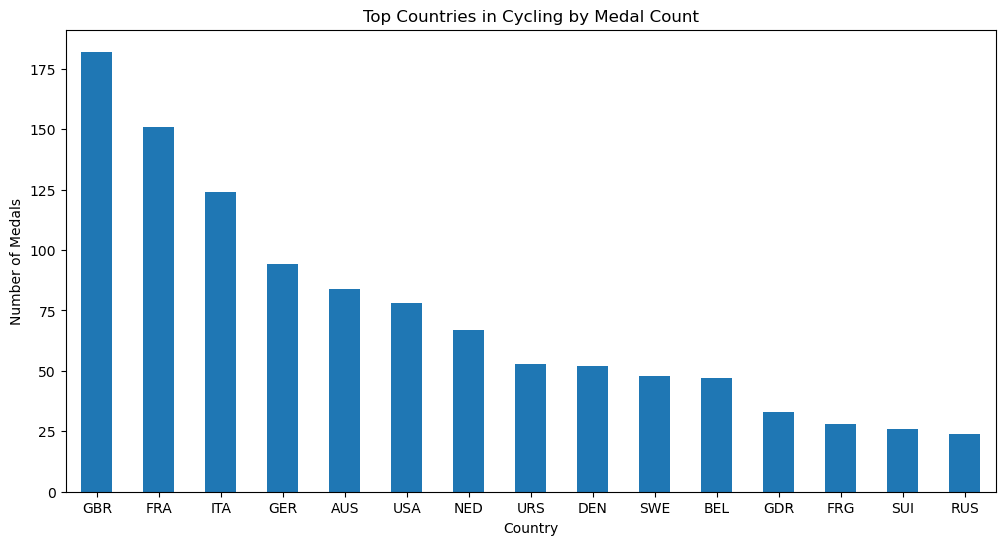

In [ ]:
for sport in sport_medal_counts.index:
    top_countries_in_sport(sport)